***Data Analysis Mini Project:***
It is time for a project that covers all the concepts you have learned so far: Data Analysis. I have provided you with a dataset of university enrollment. The university has started offering online courses to reach a wider range of students and wants your help to understand enrollment trends. You are asked to use the concepts you have learned, such as statistics, data cleaning, transformations (if needed), and visualizations, to find important insights from the dataset. Specifically, identify what contributes to higher enrollment and determine if the course type (online or classroom) is a significant factor. This is an unguided project, so you will need to apply your understanding independently as no guided questions will be provided.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("data.csv")

In [33]:
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,NaN,Technology
1847,1848,online,2011,257,76,81.0,NaN,Mathematics
1848,1849,online,2013,256,20.67,66.0,NaN,Math


In [34]:
df.describe()

,course_id,year,enrollment_count,post_score
count,1850.000000,1850.000000,1850.000000,1665.000000
mean,925.500000,2016.423784,231.565405,75.204805
std,534.193317,3.448278,36.987029,8.511981
min,1.000000,2011.000000,154.000000,51.000000
25%,463.250000,2013.000000,185.000000,69.000000
50%,925.500000,2016.000000,251.000000,75.000000
75%,1387.750000,2019.000000,261.000000,81.000000
max,1850.000000,2022.000000,267.000000,105.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   959 non-null    object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [36]:
df["post_score"].isnull().sum()

np.int64(185)

In [37]:
df["pre_requirement"].isnull().sum()

np.int64(891)

In [38]:
df = df.drop(columns=['pre_requirement'])

In [39]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,department
0,1,classroom,2018,165,28.14,73.0,Science
1,2,classroom,2020,175,79.68,86.0,Science
2,3,online,2016,257,57.24,80.0,Mathematics
3,4,online,2013,251,97.67,75.0,Technology
4,5,classroom,2019,165,39.75,76.0,Science


In [40]:
df["post_score"].fillna(df["post_score"].mean(), inplace=True)

<ipython-input-40-5d36bb596717>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["post_score"].fillna(df["post_score"].mean(), inplace=True)


In [41]:
df["post_score"] = df["post_score"].astype(int)

In [42]:
df["post_score"].isnull().sum()

np.int64(0)

In [43]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,department
0,1,classroom,2018,165,28.14,73,Science
1,2,classroom,2020,175,79.68,86,Science
2,3,online,2016,257,57.24,80,Mathematics
3,4,online,2013,251,97.67,75,Technology
4,5,classroom,2019,165,39.75,76,Science


In [44]:
df.query('course_type == "online"')

,course_id,course_type,year,enrollment_count,pre_score,post_score,department
2,3,online,2016,257,57.24,80,Mathematics
3,4,online,2013,251,97.67,75,Technology
5,6,online,2014,246,50.1,76,Math
6,7,online,2021,241,87.83,84,Science
7,8,online,2018,261,76.48,88,Technology
...,...,...,...,...,...,...,...
1844,1845,online,2012,261,-,78,Technology
1846,1847,online,2016,261,94.27,85,Technology
1847,1848,online,2011,257,76,81,Mathematics
1848,1849,online,2013,256,20.67,66,Math


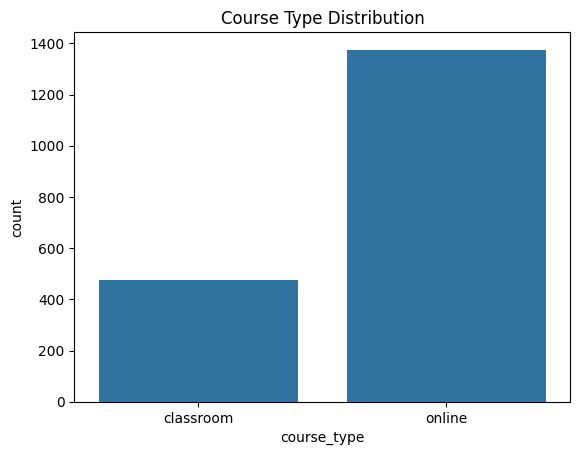

In [45]:
sns.countplot(data=df, x='course_type')
plt.title("Course Type Distribution")
plt.show()

In [ ]:
course_type_enrollment = df.groupby('course_type')['enrollment_count'].sum()
print("\nTotal Enrollment by Course Type:\n", course_type_enrollment)


Total Enrollment by Course Type:
 course_type
classroom     80954
online       347442
Name: enrollment_count, dtype: int64


<ipython-input-47-a6ad67b14bfc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='course_type', y='enrollment_count', data=df, estimator='mean', palette='pastel')


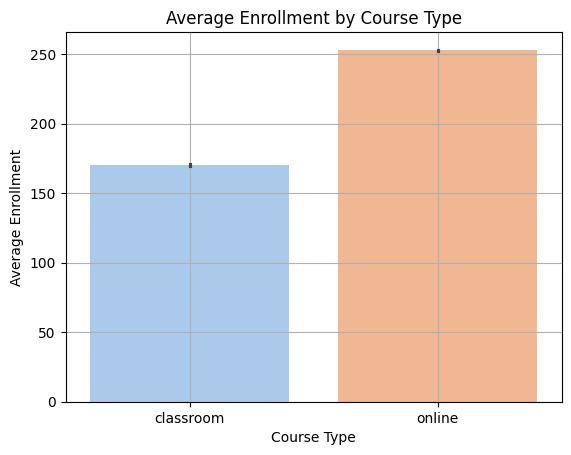

In [47]:
sns.barplot(x='course_type', y='enrollment_count', data=df, estimator='mean', palette='pastel')

plt.title('Average Enrollment by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Average Enrollment')
plt.grid(True)
plt.show()

<ipython-input-48-384fb41240e8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='course_type', y='pre_score', data=df, palette='Set2')


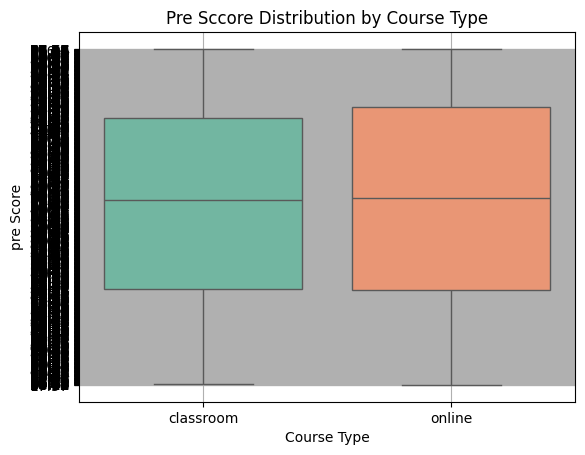

In [48]:
sns.boxplot(x='course_type', y='pre_score', data=df, palette='Set2')

plt.title('Pre Sccore Distribution by Course Type')
plt.xlabel('Course Type')
plt.ylabel('pre Score')
plt.grid(True)
plt.show()

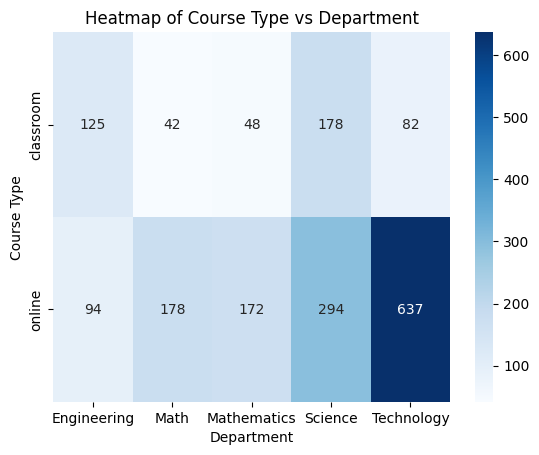

In [49]:
cross_tab = pd.crosstab(df['course_type'], df['department'])

sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Heatmap of Course Type vs Department')
plt.xlabel('Department')
plt.ylabel('Course Type')
plt.show()


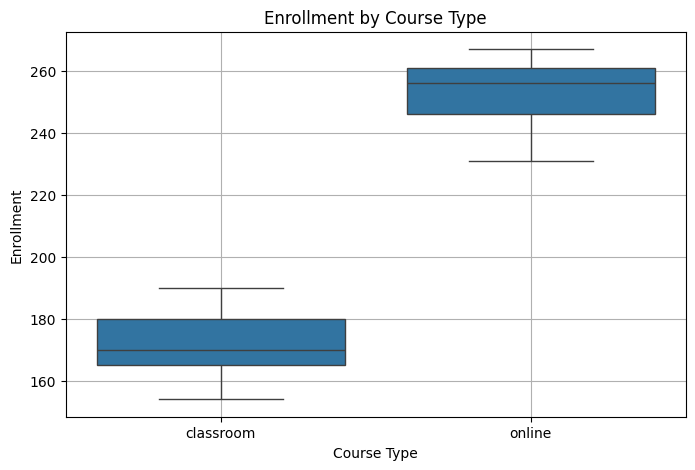

In [50]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='course_type', y='enrollment_count', data=df)
plt.title('Enrollment by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Enrollment')
plt.grid(True)
plt.show()

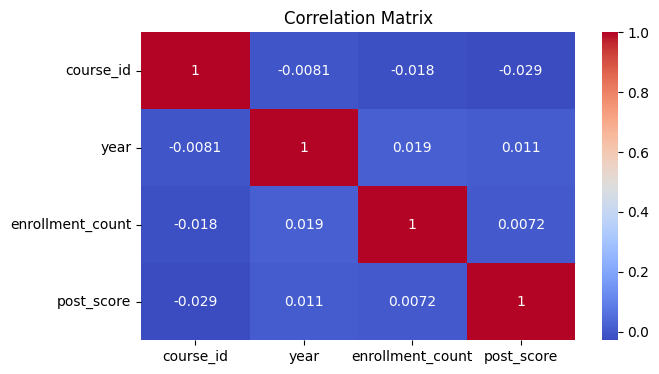

In [51]:
plt.figure(figsize=(7, 4))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [57]:
if 'department' in df.columns:
    avg_enrollment_dept = df.groupby('department')['enrollment_count'].mean().sort_values(ascending=False)
    print("\nAverage Enrollment by Department:\n", avg_enrollment_dept)


Average Enrollment by Department:
 department
Technology     248.397775
Math           235.750000
Mathematics    233.163636
Science        213.076271
Engineering    210.342466
Name: enrollment_count, dtype: float64


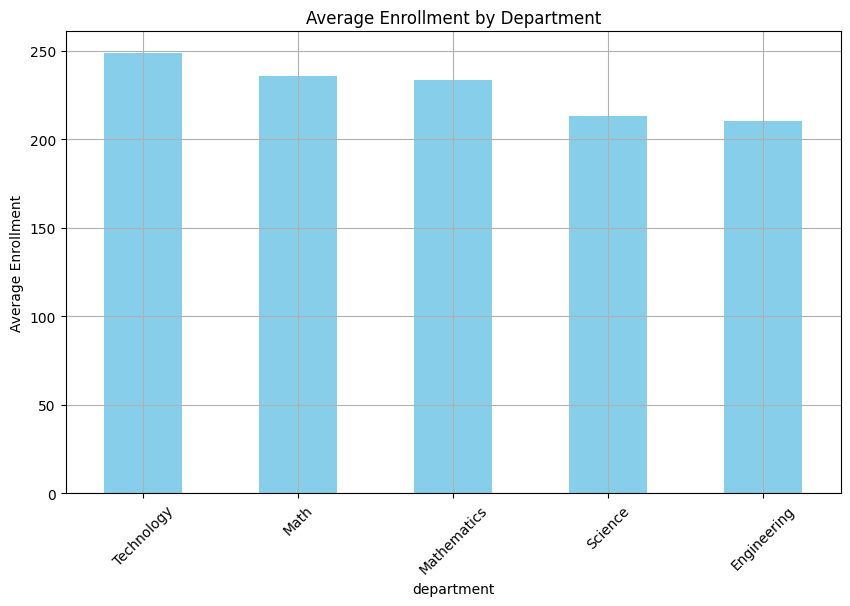

In [56]:
    plt.figure(figsize=(10, 6))
    avg_enrollment_dept.plot(kind='bar', color='skyblue')
    plt.title('Average Enrollment by Department')
    plt.ylabel('Average Enrollment')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [30]:
print("\n📝 Insights Summary:")

if df['enrollment_count'].mean() < df[df['course_type'] == 'online']['enrollment_count'].mean():
    print("- 📈 Online courses tend to have higher enrollments.")
else:
    print("- 🏫 Classroom courses tend to have higher enrollments.")


📝 Insights Summary:
- 📈 Online courses tend to have higher enrollments.
